###  นำ Libraries ที่จำเป็นต้องนำมาใช้ทั้งหมด

In [590]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pythainlp import word_tokenize
from sklearn.preprocessing import normalize

### นำข้อมูลจาก Github 

In [591]:
data= pd.read_csv('https://github.com/chanatsit/AI_UTCC/raw/main/forecast%20-%20forecast.csv', header=None)

###  อ่านข้อมูลจากไฟล์ Excel และแปลงข้อมูลไปเป็น Dataframe

In [592]:
nrow = len(data.axes[0])
ncol = len(data.axes[1])

In [593]:
mylist = []

### อ่านข้อมูลจาก cell ทุก cell และต่อกัน list

In [594]:
for j in range(ncol):
    for i in range(nrow):
        mylst = data[j][i]
        mylist.append(mylst)

### อ่านข้อมูลใน mylist ที่ไม่เป็น null

In [595]:
df = [x for x in mylist if pd.notnull(x)]

In [596]:
df = pd.DataFrame(df)

In [597]:
df.head(3)

,0
0,Energy security must be addressed to ensure co...
1,It is the largest deal to date for Zynga
2,The Federal Reserve released its CCAR 2018 res...


### Split ออกเป็น 2 column โดยพิจารณาเครื่องหมาย " | "

In [598]:
df[1] = df[0].str.split('|').str[1]

In [599]:
df.dropna(subset = [1], inplace=True)

### เปลี่ยนชื่อ column

In [600]:
df.rename(columns={0:'Text', 1:'Label'}, inplace=True)

### ดึง column ออกมาเป็น list และตัดคำ Forecast และ Non-Forecast ออกจาก list

In [601]:
Text_col = list(df['Text'])

In [602]:
Text_col =[s.replace('|Forecast','').replace('|Non-Forecast','') for s in Text_col]

In [603]:
df['Text'] = Text_col

In [604]:
df = df.reset_index(drop=True)

In [605]:
df_forecast = df.loc[df['Label'] == 'Forecast']
df_non_forecast = df.loc[df['Label'] == 'Non-Forecast']

In [606]:
num_text = len(df_forecast)
num_label = len(df_non_forecast)

In [607]:
num_text

500

In [608]:
num_label

499

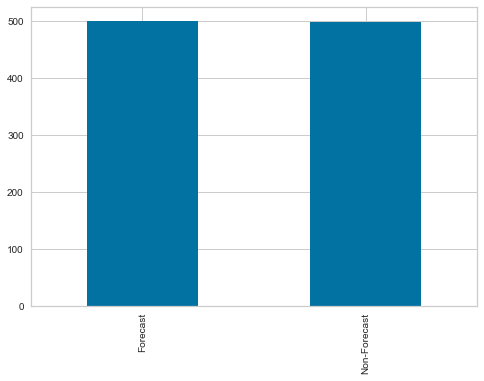

In [609]:
df.Label.value_counts().plot.bar();

### แปลง Label ให้เป็น Encoder Catagorical 

In [610]:
le = LabelEncoder()

In [611]:
df['Label'] = le.fit_transform(df['Label'])

In [612]:
df

,Text,Label
0,Energy security must be addressed to ensure co...,0
1,Technology spending is forecast to grow 4.1 pe...,0
2,Australias recent operational experiences and ...,0
3,Common sense for anybody living within a budget.,1
4,Drone use in agriculture could be as common as...,0
...,...,...
994,the research team writes in the journal Injury...,1
995,traction management system information and whe...,1
996,in order to spot violent or extremist material...,0
997,his backing was important political symbolism.,1


### Split dataset to train set and test set

In [613]:
from sklearn.model_selection import train_test_split

In [614]:
train_data, test_data, train_label, test_label= train_test_split(text, label, test_size=0.20, random_state=2020)

### Feature Extraction 

In [615]:
 # สร้าง Function ในการตัดคำ และ ทำความสะอาดข้อมูล
def get_th_token(text):
    text = text.lower() 
    text = text.replace('\n',' ')
    token = word_tokenize(text, engine="newmm")
    return token

In [616]:
vectorizer = CountVectorizer(tokenizer=get_th_token, ngram_range=(1,2))

In [617]:
vectorizer.fit(train_data)

c:\users\eak\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function get_th_token at 0x000001B4F0C698B0>)

In [618]:
train_feature = vectorizer.transform(train_data)
test_feature = vectorizer.transform(test_data)

In [619]:
train_feature

<799x11216 sparse matrix of type '<class 'numpy.int64'>'
	with 35105 stored elements in Compressed Sparse Row format>

In [620]:
train_feature.shape

(799, 11216)

In [621]:
train_feature.toarray()

array([[13,  0,  0, ...,  0,  0,  0],
       [18,  0,  0, ...,  0,  0,  0],
       [16,  0,  0, ...,  0,  0,  0],
       ...,
       [11,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [622]:
test_feature.shape

(200, 11216)

In [623]:
test_feature

<200x11216 sparse matrix of type '<class 'numpy.int64'>'
	with 7362 stored elements in Compressed Sparse Row format>

In [624]:
test_feature.toarray()

array([[18,  0,  0, ...,  0,  0,  0],
       [21,  0,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  0,  0,  0],
       ...,
       [23,  0,  0, ...,  0,  1,  1],
       [15,  0,  0, ...,  0,  0,  0],
       [19,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [625]:
train_feature_normalize = normalize(train_feature)
test_feature_normalize = normalize(test_feature)

In [626]:
train_feature_normalize

<799x11216 sparse matrix of type '<class 'numpy.float64'>'
	with 35105 stored elements in Compressed Sparse Row format>

In [627]:
train_feature_normalize.shape
# โดยที่ Shape ของ Data ยังคงเท่ากันกับ train_feature ที่ยังไม่ทำการ Normalize

(799, 11216)

In [628]:
train_feature_normalize.toarray()

array([[0.8824975 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90567829, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90727676, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.87789557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83862787, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81928803, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [629]:
test_feature_normalize

<200x11216 sparse matrix of type '<class 'numpy.float64'>'
	with 7362 stored elements in Compressed Sparse Row format>

In [630]:
test_feature_normalize.shape

(200, 11216)

In [631]:
test_feature_normalize.toarray()

array([[0.92216794, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93727587, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.875     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95012124, 0.        , 0.        , ..., 0.        , 0.04130962,
        0.04130962],
       [0.91456614, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91839966, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### LinearSVM algorithm

In [632]:
from sklearn.svm import LinearSVC
from yellowbrick.model_selection import CVScores
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import (classification_report, make_scorer, 
                             confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)


In [633]:
model_SVC = LinearSVC(random_state=2020)

In [634]:
model_SVC.fit(train_feature_normalize, train_label)

LinearSVC(random_state=2020)

In [635]:
c5_SVC = cross_val_score(model_SVC, train_feature_normalize, train_label, cv=5, scoring='accuracy')
mc5_SVC = cross_val_score(model_SVC, train_feature_normalize, train_label, cv=5, scoring='accuracy').mean()
print(c5_SVC)
print(mc5_SVC)

[0.8875     0.875      0.9        0.9        0.87421384]
0.8873427672955975


In [636]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c5_SVC_CV_score = cross_validate(model_SVC, train_feature_normalize, train_label, cv=5, scoring=(scoring))
c5_SVC_CV_score

{'fit_time': array([0.00697994, 0.00598764, 0.00698137, 0.00598693, 0.00593829]),
 'score_time': array([0.00303674, 0.00299191, 0.00299168, 0.00299501, 0.00303769]),
 'test_accuracy': array([0.8875    , 0.875     , 0.9       , 0.9       , 0.87421384]),
 'test_precision': array([0.87951807, 0.84883721, 0.9       , 0.8902439 , 0.84883721]),
 'test_recall': array([0.90123457, 0.9125    , 0.9       , 0.9125    , 0.9125    ]),
 'test_f1_score': array([0.8902439 , 0.87951807, 0.9       , 0.90123457, 0.87951807])}

In [637]:
c5_SVC_CV_score_table = pd.DataFrame(c5_SVC_CV_score)
c5_SVC_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.006980,0.003037,0.887500,0.879518,0.901235,0.890244
1,0.005988,0.002992,0.875000,0.848837,0.912500,0.879518
2,0.006981,0.002992,0.900000,0.900000,0.900000,0.900000
3,0.005987,0.002995,0.900000,0.890244,0.912500,0.901235
4,0.005938,0.003038,0.874214,0.848837,0.912500,0.879518


In [638]:
c5_SVC_CV_score_board = c5_SVC_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c5_SVC_CV_score_board

test_accuracy     0.887343
test_precision    0.873487
test_recall       0.907747
test_f1_score     0.890103
dtype: float64

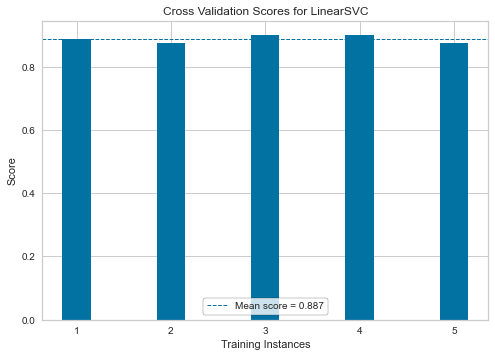

In [639]:
visualizer_c5_SVC = CVScores(model_SVC, cv=5, scoring='accuracy')
visualizer_c5_SVC.fit(train_feature_normalize, train_label)
visualizer_c5_SVC.show();

In [640]:
c10_SVC = cross_val_score(model_SVC, train_feature_normalize, train_label, cv=10, scoring='accuracy')
mc10_SVC = cross_val_score(model_SVC, train_feature_normalize, train_label, cv=10, scoring='accuracy').mean()
print(c10_SVC)
print(mc10_SVC)

[0.925      0.85       0.9        0.9        0.925      0.9125
 0.8625     0.925      0.925      0.83544304]
0.8960443037974685


In [641]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c10_SVC_CV_score = cross_validate(model_SVC, train_feature_normalize, train_label, cv=10, scoring=(scoring))
c10_SVC_CV_score

{'fit_time': array([0.00801945, 0.00896645, 0.00697255, 0.00701451, 0.00598598,
        0.00598097, 0.00598359, 0.00698113, 0.0069809 , 0.00601768]),
 'score_time': array([0.00395632, 0.00203729, 0.00295782, 0.00199723, 0.00299168,
        0.00299239, 0.00298977, 0.00299239, 0.00199437, 0.00299215]),
 'test_accuracy': array([0.925     , 0.85      , 0.9       , 0.9       , 0.925     ,
        0.9125    , 0.8625    , 0.925     , 0.925     , 0.83544304]),
 'test_precision': array([0.90697674, 0.86842105, 0.84782609, 0.9       , 0.9047619 ,
        0.90243902, 0.87179487, 0.9047619 , 0.88636364, 0.81395349]),
 'test_recall': array([0.95121951, 0.825     , 0.975     , 0.9       , 0.95      ,
        0.925     , 0.85      , 0.95      , 0.975     , 0.875     ]),
 'test_f1_score': array([0.92857143, 0.84615385, 0.90697674, 0.9       , 0.92682927,
        0.91358025, 0.86075949, 0.92682927, 0.92857143, 0.84337349])}

In [642]:
c10_SVC_CV_score_table = pd.DataFrame(c10_SVC_CV_score)
c10_SVC_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.008019,0.003956,0.925000,0.906977,0.95122,0.928571
1,0.008966,0.002037,0.850000,0.868421,0.82500,0.846154
2,0.006973,0.002958,0.900000,0.847826,0.97500,0.906977
3,0.007015,0.001997,0.900000,0.900000,0.90000,0.900000
4,0.005986,0.002992,0.925000,0.904762,0.95000,0.926829
5,0.005981,0.002992,0.912500,0.902439,0.92500,0.913580
6,0.005984,0.002990,0.862500,0.871795,0.85000,0.860759
7,0.006981,0.002992,0.925000,0.904762,0.95000,0.926829
8,0.006981,0.001994,0.925000,0.886364,0.97500,0.928571
9,0.006018,0.002992,0.835443,0.813953,0.87500,0.843373


In [643]:
c10_SVC_CV_score_board = c10_SVC_CV_score_table[['test_accuracy', 
                                                 'test_precision', 
                                                 'test_recall', 
                                                 'test_f1_score']].mean()
c10_SVC_CV_score_board

test_accuracy     0.896044
test_precision    0.880730
test_recall       0.917622
test_f1_score     0.898165
dtype: float64

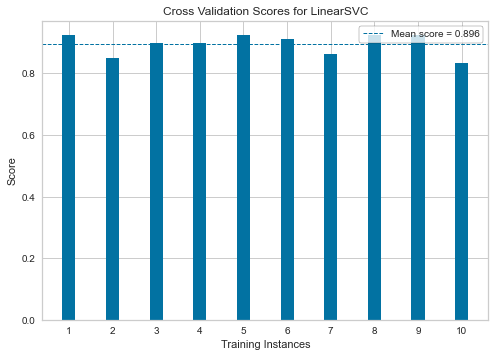

In [644]:
visualizer_c10_SVC = CVScores(model_SVC, cv=10, scoring='accuracy')

visualizer_c10_SVC.fit(train_feature_normalize, train_label)
visualizer_c10_SVC.show();

In [645]:
predict_SVC = model_SVC.predict(test_feature_normalize)

In [646]:
acc_SVC = classification_report(test_label, predict_SVC, digits=4)
print(acc_SVC)

              precision    recall  f1-score   support

           0     0.8455    0.9118    0.8774       102
           1     0.9000    0.8265    0.8617        98

    accuracy                         0.8700       200
   macro avg     0.8727    0.8691    0.8695       200
weighted avg     0.8722    0.8700    0.8697       200



In [647]:
con_mat_SVC = confusion_matrix(test_label, predict_SVC)
print(con_mat_SVC)

[[93  9]
 [17 81]]


In [677]:
ls1=0; ls2=0
for i in range(0,len(con_mat_SVC)):
    for j in range(0,len(con_mat_SVC)):
        ls1=ls1+con_mat_SVC[i,j]
        if(i==j):
            ls2=ls2+con_mat_SVC[i,j]
accuracy_SVC = ls2/ls1
print('The accuracy of SVC is {}%'.format(accuracy_SVC))

The accuracy of SVC is 0.87%


c:\users\eak\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


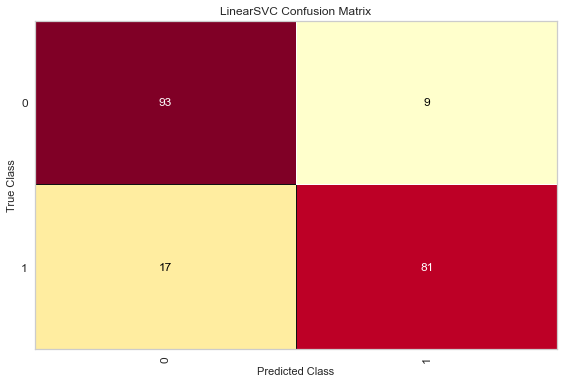

In [648]:
svc_cm = ConfusionMatrix(model_SVC)
svc_cm.fit(train_feature_normalize, train_label)
svc_cm.score(test_feature_normalize, test_label)
svc_cm.show();

### Random Forest algorithm

In [649]:
from sklearn.ensemble import RandomForestClassifier

In [650]:
model_RDF = RandomForestClassifier(n_estimators=100, random_state=2020)

In [651]:
model_RDF.fit(train_feature_normalize, train_label)

RandomForestClassifier(random_state=2020)

In [652]:
c5_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=5, scoring='accuracy')
mc5_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=5, scoring='accuracy').mean()
print(c5_RDF)
print(mc5_RDF)

[0.88125    0.875      0.8625     0.875      0.85534591]
0.8698191823899372


In [653]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c5_RDF_CV_score = cross_validate(model_RDF, train_feature_normalize, train_label, cv=5, scoring=(scoring))
c5_RDF_CV_score

{'fit_time': array([0.58700895, 0.55148053, 0.56748152, 0.58845448, 0.59348774]),
 'score_time': array([0.01695585, 0.01800132, 0.01695514, 0.01894999, 0.01804996]),
 'test_accuracy': array([0.88125   , 0.875     , 0.8625    , 0.875     , 0.85534591]),
 'test_precision': array([0.87804878, 0.83333333, 0.8452381 , 0.85714286, 0.83529412]),
 'test_recall': array([0.88888889, 0.9375    , 0.8875    , 0.9       , 0.8875    ]),
 'test_f1_score': array([0.88343558, 0.88235294, 0.86585366, 0.87804878, 0.86060606])}

In [654]:
c5_RDF_CV_score_table = pd.DataFrame(c5_RDF_CV_score)
c5_RDF_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.587009,0.016956,0.881250,0.878049,0.888889,0.883436
1,0.551481,0.018001,0.875000,0.833333,0.937500,0.882353
2,0.567482,0.016955,0.862500,0.845238,0.887500,0.865854
3,0.588454,0.018950,0.875000,0.857143,0.900000,0.878049
4,0.593488,0.018050,0.855346,0.835294,0.887500,0.860606


In [655]:
c5_RDF_CV_score_board = c5_RDF_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c5_RDF_CV_score_board

test_accuracy     0.869819
test_precision    0.849811
test_recall       0.900278
test_f1_score     0.874059
dtype: float64

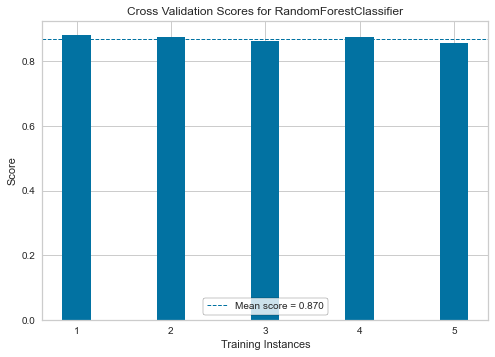

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [656]:
visualizer_c5_RDF = CVScores(model_RDF, cv=5, scoring='accuracy')

visualizer_c5_RDF.fit(train_feature_normalize, train_label)
visualizer_c5_RDF.show() 

In [657]:
c10_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=10, scoring='accuracy')
mc10_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=10, scoring='accuracy').mean()

print(c10_RDF)
print(mc10_RDF)

[0.9        0.85       0.8375     0.8625     0.85       0.8875
 0.8625     0.9125     0.9375     0.75949367]
0.8659493670886077


In [658]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c10_RDF_CV_score = cross_validate(model_RDF, train_feature_normalize, train_label, cv=10, scoring=(scoring))
c10_RDF_CV_score

{'fit_time': array([0.6480391 , 0.64663839, 0.64242339, 0.64213204, 0.65266037,
        0.63430333, 0.6316731 , 0.63359714, 0.60774636, 0.61384678]),
 'score_time': array([0.01496792, 0.01696062, 0.01595736, 0.01591301, 0.01496053,
        0.01405311, 0.01396275, 0.01400471, 0.01517749, 0.0150454 ]),
 'test_accuracy': array([0.9       , 0.85      , 0.8375    , 0.8625    , 0.85      ,
        0.8875    , 0.8625    , 0.9125    , 0.9375    , 0.75949367]),
 'test_precision': array([0.90243902, 0.85      , 0.7755102 , 0.8372093 , 0.83333333,
        0.87804878, 0.8372093 , 0.90243902, 0.88888889, 0.75609756]),
 'test_recall': array([0.90243902, 0.85      , 0.95      , 0.9       , 0.875     ,
        0.9       , 0.9       , 0.925     , 1.        , 0.775     ]),
 'test_f1_score': array([0.90243902, 0.85      , 0.85393258, 0.86746988, 0.85365854,
        0.88888889, 0.86746988, 0.91358025, 0.94117647, 0.7654321 ])}

In [659]:
c10_RDF_CV_score_table = pd.DataFrame(c10_RDF_CV_score)
c10_RDF_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.648039,0.014968,0.900000,0.902439,0.902439,0.902439
1,0.646638,0.016961,0.850000,0.850000,0.850000,0.850000
2,0.642423,0.015957,0.837500,0.775510,0.950000,0.853933
3,0.642132,0.015913,0.862500,0.837209,0.900000,0.867470
4,0.652660,0.014961,0.850000,0.833333,0.875000,0.853659
5,0.634303,0.014053,0.887500,0.878049,0.900000,0.888889
6,0.631673,0.013963,0.862500,0.837209,0.900000,0.867470
7,0.633597,0.014005,0.912500,0.902439,0.925000,0.913580
8,0.607746,0.015177,0.937500,0.888889,1.000000,0.941176
9,0.613847,0.015045,0.759494,0.756098,0.775000,0.765432


In [660]:
c10_RDF_CV_score_board = c10_RDF_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c10_RDF_CV_score_board

test_accuracy     0.865949
test_precision    0.846118
test_recall       0.897744
test_f1_score     0.870405
dtype: float64

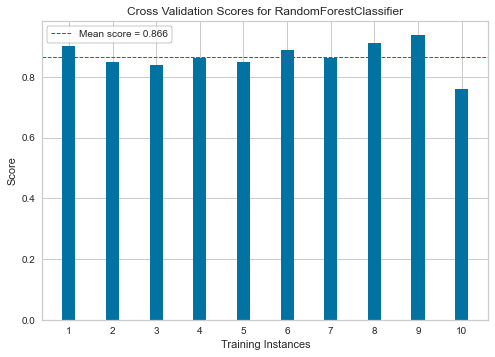

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [661]:
visualizer_c10_RDF = CVScores(model_RDF, cv=10, scoring='accuracy')

visualizer_c10_RDF.fit(train_feature_normalize, train_label)
visualizer_c10_RDF.show()

In [662]:
predict_RDF = model_RDF.predict(test_feature_normalize)

In [663]:
acc_RDF = classification_report(test_label, predict_RDF, digits=4)
print(acc_RDF)

              precision    recall  f1-score   support

           0     0.8932    0.9020    0.8976       102
           1     0.8969    0.8878    0.8923        98

    accuracy                         0.8950       200
   macro avg     0.8951    0.8949    0.8949       200
weighted avg     0.8950    0.8950    0.8950       200



In [664]:
con_mat_RDF = confusion_matrix(test_label, predict_RDF)
print(con_mat_RDF)

[[92 10]
 [11 87]]


In [678]:
lm1=0; lm2=0
for i in range(0,len(con_mat_RDF)):
    for j in range(0,len(con_mat_RDF)):
        lm1=lm1+con_mat_RDF[i,j]
        if(i==j):
            lm2=lm2+con_mat_RDF[i,j]
accuracy_RDF = ls2/ls1
print('The accuracy of RDF is {}%'.format(accuracy_RDF))

The accuracy of RDF is 0.87%


c:\users\eak\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


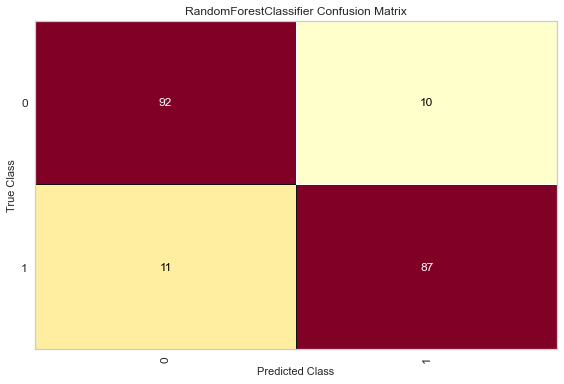

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [666]:
rd_cm = ConfusionMatrix(model_RDF)

rd_cm.fit(train_feature_normalize, train_label)
rd_cm.score(test_feature_normalize, test_label)

rd_cm.show()

In [667]:
prob_result_table = pd.DataFrame()
prob_result_table['Text'] = test_data
prob_result_table['Lebel'] = test_label
prob_result_table['Label_Predict'] = predict_SVC
prob_result_table

,Text,Lebel,Label_Predict
405,A ban on internal combustion engines is expect...,0,0
292,Behaviors help you differentiate yourself as a...,1,1
746,the victories may come to a screeching halt.,1,1
838,and core resources.,1,1
495,The current study tested the effectiveness of ...,1,1
...,...,...,...
407,Increasing prevalence of chronic disease such ...,0,0
429,China is different.,1,1
193,Turkey has long advocated a secure zone for di...,0,1
725,which states that Round-trip efficiency... is ...,1,1


In [679]:
print('The accuracy of SVM is {}%'.format(accuracy_SVM))
print('The accuracy of RDF is {}%'.format(accuracy_RDF))

The accuracy of SVM is 0.895%
The accuracy of RDF is 0.87%


สรุปจากผลจากการทดสอบความถูกต้อง(accuracy) ของ  SVM algorithm และ Random Forest algorithm คือ 0.89% และ 0.87% ตามลำดับ 
ดังนั้น ผู้ใช้เลือกใช้ SVM algorithm จะช่วยเพิ่มความถูกต้องในการทำนายได้มากยิ่งขึ้น